# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
cities

['atuona',
 'leningradskiy',
 'busselton',
 'vaini',
 'albany',
 'carnarvon',
 'laguna',
 'ushuaia',
 'hobart',
 'empalme',
 'inuvik',
 'puerto ayora',
 'isla vista',
 'dikson',
 'rikitea',
 'new norfolk',
 'benjamin constant',
 'mirabela',
 'bengkulu',
 'iqaluit',
 'matinha',
 'hostotipaquillo',
 'kapaa',
 'necochea',
 'valle del guamuez',
 'viligili',
 'arlit',
 'zomba',
 'mys shmidta',
 'xihe',
 'constitucion',
 'tuktoyaktuk',
 'mildura',
 'kropotkin',
 'lompoc',
 'thompson',
 'barrow',
 'taunggyi',
 'naze',
 'hobyo',
 'artyom',
 'port elizabeth',
 'belushya guba',
 'honningsvag',
 'hilo',
 'tazovskiy',
 'svetlogorsk',
 'ixtapa',
 'djibo',
 'camargo',
 'nantucket',
 'tuatapere',
 'kahului',
 'linqing',
 'mar del plata',
 'sorland',
 'airai',
 'nadvoitsy',
 'hermanus',
 'seoul',
 'ishigaki',
 'cidreira',
 'montelimar',
 'kibre mengist',
 'lavrentiya',
 'vao',
 'vicuna',
 'namatanai',
 'punta arenas',
 'saint-philippe',
 'bloomfield',
 'bluff',
 'yellowknife',
 'praya',
 'port alfred'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query_url = base_url + "APPID=" + weather_api_key
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="
city_url = query_url + "&q=" + city.replace(" ","+")
response = requests.get(city_url).json()

In [5]:
# retrieve dictionary keys
response.keys()

dict_keys(['cod', 'message'])

In [6]:
City = []
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []
Record = 1
Set = 1

# date = pd.to_datetime(int(response["dt"]))#.strftime('%m-%d-%Y')

print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        City.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        
        if Record > 49:
            Record = 0
            Set = Set + 1
    
        else:
            Record = Record + 1
            
        print(f"Processing Record {Record} of Set {Set}: {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 2 of Set 1: atuona
Processing Record 3 of Set 1: leningradskiy
Processing Record 4 of Set 1: busselton
Processing Record 5 of Set 1: vaini
Processing Record 6 of Set 1: albany
Processing Record 7 of Set 1: carnarvon
Processing Record 8 of Set 1: laguna
Processing Record 9 of Set 1: ushuaia
Processing Record 10 of Set 1: hobart
Processing Record 11 of Set 1: empalme
Processing Record 12 of Set 1: inuvik
Processing Record 13 of Set 1: puerto ayora
Processing Record 14 of Set 1: isla vista
Processing Record 15 of Set 1: dikson
Processing Record 16 of Set 1: rikitea
Processing Record 17 of Set 1: new norfolk
Processing Record 18 of Set 1: benjamin constant
Processing Record 19 of Set 1: mirabela
Processing Record 20 of Set 1: bengkulu
Processing Record 21 of Set 1: iqaluit
Processing Record 22 of Set 1: matinha
Processing Record 23 of Set 1: hostotipaquillo
Processing Record 24 of Set 1: kapaa
Processing Record 25 of

KeyboardInterrupt: 

In [8]:
City

['Atuona',
 'Leningradskiy',
 'Busselton',
 'Vaini',
 'Albany',
 'Carnarvon',
 'Laguna',
 'Ushuaia',
 'Hobart',
 'Empalme',
 'Inuvik',
 'Puerto Ayora',
 'Isla Vista',
 'Dikson',
 'Rikitea',
 'New Norfolk',
 'Benjamin Constant',
 'Mirabela',
 'Bengkulu',
 'Iqaluit',
 'Matinha',
 'Hostotipaquillo',
 'Kapaa',
 'Necochea',
 'Valle del Guamuez',
 'Arlit',
 'Zomba',
 'Xihe',
 'Constitución',
 'Tuktoyaktuk',
 'Mildura',
 'Kropotkin',
 'Lompoc',
 'Thompson',
 'Barrow',
 'Taunggyi',
 'Naze',
 'Hobyo',
 'Artyom',
 'Port Elizabeth',
 'Honningsvåg',
 'Hilo',
 'Tazovsky',
 'Forsytheganj',
 'Ixtapa',
 'Djibo',
 'Camargo',
 'Nantucket',
 'Tuatapere',
 'Kahului',
 'Linqing',
 'Mar del Plata',
 'Sørland',
 'Airai',
 'Nadvoitsy',
 'Hermanus',
 'Seoul',
 'Ishigaki',
 'Cidreira',
 'Montélimar',
 'Kibre Mengist',
 'Lavrentiya',
 'Vao',
 'Vicuña',
 'Namatanai',
 'Punta Arenas',
 'Saint-Philippe',
 'Bloomfield',
 'Bluff',
 'Yellowknife',
 'Praia',
 'Port Alfred',
 'San Alberto',
 'Ostrovnoy',
 'Khatanga',
 '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#export to csv
df.to_csv("../output_data/cities.csv", index = False)

In [10]:
# create df

df = pd.DataFrame({
    "City": City,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
})

# display df
df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,76.53,78,30,17.25,PF,1665826901
1,Leningradskiy,69.3833,178.4167,11.12,86,71,5.26,RU,1665826902
2,Busselton,-33.6500,115.3333,57.85,65,20,13.06,AU,1665826902
3,Vaini,-21.2000,-175.2000,69.96,100,20,2.30,TO,1665826902
4,Albany,42.6001,-73.9662,41.54,90,4,0.92,US,1665826902


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,2.150000e+02
mean,20.004447,12.759186,60.496977,73.362791,55.958140,9.034512,1.665827e+09
std,35.687159,96.494117,19.442751,20.200826,39.899091,5.847913,6.367953e+01
min,-54.800000,-175.200000,-4.490000,8.000000,0.000000,0.000000,1.665827e+09
25%,-13.550900,-72.320850,48.120000,65.000000,16.000000,4.610000,1.665827e+09
50%,25.000000,18.944900,63.570000,78.000000,66.000000,8.010000,1.665827e+09
75%,49.116650,100.393550,76.295000,88.000000,99.500000,12.660000,1.665827e+09
max,77.484000,179.316700,97.110000,100.000000,100.000000,31.070000,1.665827e+09


In [14]:
# remove the cities where the humidity is >100%
# humidity_100 = []

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [19]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity',
       'Cloudiness', 'Wind Speed', 'Country', 'Date'],
      dtype='object')

## Latitude vs. Temperature Plot

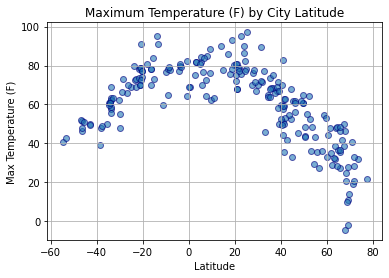

The Maximum Temperature (F) by City Latitude scatter plot shows that the maximum temperature (F) peaks around 0 latitiude, but drops either ends of the latitude in an inverted U shape.


In [35]:
x_value = df["Latitude"]
y_value = df["Max Temperature"]

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.title("Maximum Temperature (F) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

print("The Maximum Temperature (F) by City Latitude scatter plot shows the change in maximum temperature against city latitude")

## Latitude vs. Humidity Plot

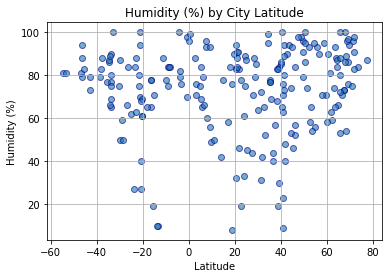

The Humidity (%) by City Latitude scatter plot shows the change in humidity against city latitude.


In [37]:
x_value = df["Latitude"]
y_value = df["Humidity"]

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.title("The Humidity (%) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

print("The Humidity (%) by City Latitude scatter plot shows the change in humidity against city latitude.")

## Latitude vs. Cloudiness Plot

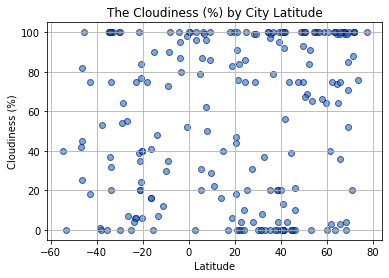

The Cloudiness (%) by City Latitude scatter plot shows the change in cloudiness against city latitude.


In [38]:
x_value = df["Latitude"]
y_value = df["Cloudiness"]

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.title("The Cloudiness (%) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

print("The Cloudiness (%) by City Latitude scatter plot shows the change in cloudiness against city latitude.")

## Latitude vs. Wind Speed Plot

In [39]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity',
       'Cloudiness', 'Wind Speed', 'Country', 'Date'],
      dtype='object')

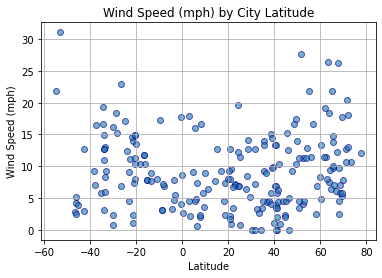

The Windspeed by City Latitude scatter plot shows the change in wind speed against city latitude.


In [41]:
x_value = df["Latitude"]
y_value = df["Wind Speed"]

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.title("Wind Speed (mph) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

print("The Windspeed by City Latitude scatter plot shows the change in wind speed against city latitude.")

## Linear Regression

In [94]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
north = df.loc[df["Latitude"] >= 0]
# Southern Hemisphere (less than 0 degrees latitude)
south = df.loc[df["Latitude"] < 0]

In [95]:
north.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Leningradskiy,69.3833,178.4167,11.12,86,71,5.26,RU,1665826902
4,Albany,42.6001,-73.9662,41.54,90,4,0.92,US,1665826902
6,Laguna,38.4210,-121.4238,66.94,83,0,5.75,US,1665826902
9,Empalme,27.9667,-110.8167,76.35,71,4,8.48,MX,1665826902
10,Inuvik,68.3499,-133.7218,20.41,89,0,5.75,CA,1665826764


In [96]:
south.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,76.53,78,30,17.25,PF,1665826901
2,Busselton,-33.6500,115.3333,57.85,65,20,13.06,AU,1665826902
3,Vaini,-21.2000,-175.2000,69.96,100,20,2.30,TO,1665826902
5,Carnarvon,-24.8667,113.6333,68.79,62,0,17.13,AU,1665826902
7,Ushuaia,-54.8000,-68.3000,40.66,81,40,21.85,AR,1665826902


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

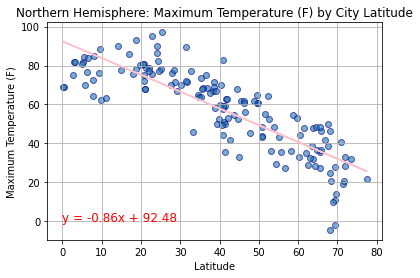

<Figure size 432x288 with 0 Axes>

In [108]:
x_value = north["Latitude"]
y_value = north["Max Temperature"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
n_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Northern Hemisphere: Maximum Temperature (F) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.annotate(n_equation, (0,0), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("North Lat x Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

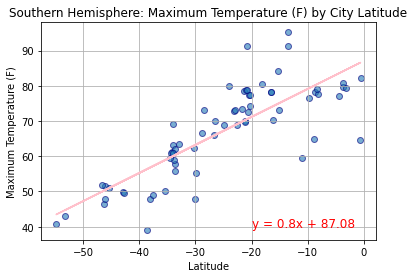

<Figure size 432x288 with 0 Axes>

In [109]:
x_value = south["Latitude"]
y_value = south["Max Temperature"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
s_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Southern Hemisphere: Maximum Temperature (F) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.annotate(s_equation, (-20,40), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("South Lat x Temp.png")

In [117]:
# After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

print(f"These scatter plots show the change in maximum temperature (F) against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: {n_equation}, whilst the Southern Hemisphere linear equation is: {s_equation}. The Northern Hemisphere shows a negative correlation, however the Sothern Hemisphere shows a positive correlaton; suggesting that the closer the latitude to the equator, the higher the maximum temperature (F).")

These scatter plots show the change in maximum temperature (F) against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: y = 0.19x + 65.99, whilst the Southern Hemisphere linear equation is: y = -0.24x + 66.74. The Northern Hemisphere shows a negative correlation, however the Sothern Hemisphere shows a positive correlaton; suggesting that the closer the latitude to the equator, the higher the maximum temperature (F).


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

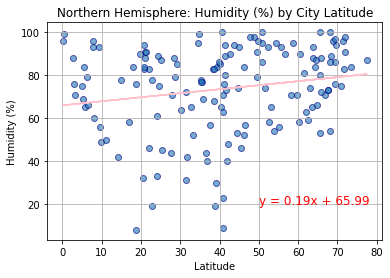

<Figure size 432x288 with 0 Axes>

In [112]:
x_value = north["Latitude"]
y_value = north["Humidity"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
n_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Northern Hemisphere: Humidity (%) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(n_equation, (50,20), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("North Lat x Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

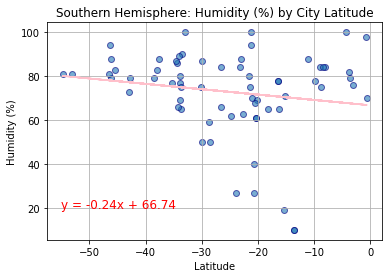

<Figure size 432x288 with 0 Axes>

In [116]:
x_value = south["Latitude"]
y_value = south["Humidity"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
s_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Southern Hemisphere: Humidity (%) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(s_equation, (-55,20), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("South Lat x Humidity.png")

In [118]:
# After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

print(f"These scatter plots show the change in humidity percentage against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: {n_equation}, whilst the Southern Hemisphere linear equation is: {s_equation}. The Northern Hemisphere shows a positive correlation, however the Sothern Hemisphere shows a negative correlaton; suggesting that the closer the latitude to the equator, the lower the humidity percentage, but it still remains higher than 60%.")

These scatter plots show the change in humidity percentage against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: y = 0.19x + 65.99, whilst the Southern Hemisphere linear equation is: y = -0.24x + 66.74. The Northern Hemisphere shows a positive correlation, however the Sothern Hemisphere shows a negative correlaton; suggesting that the closer the latitude to the equator, the lower the humidity percentage, but it still remains higher than 60%.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

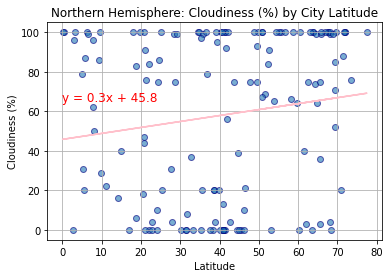

<Figure size 432x288 with 0 Axes>

In [123]:
x_value = north["Latitude"]
y_value = north["Cloudiness"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
n_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Northern Hemisphere: Cloudiness (%) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(n_equation, (0,65), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("North Lat x Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

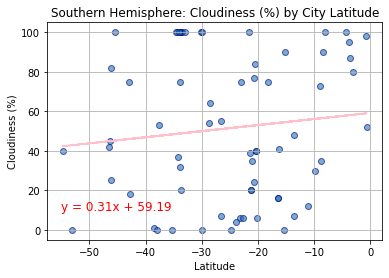

<Figure size 432x288 with 0 Axes>

In [126]:
x_value = south["Latitude"]
y_value = south["Cloudiness"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
s_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Southern Hemisphere: Cloudiness (%) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(s_equation, (-55,10), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("South Lat x Cloudiness.png")

In [127]:
# After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

print(f"These scatter plots show the change in cloudiness percentage against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: {n_equation}, whilst the Southern Hemisphere linear equation is: {s_equation}. The Northern and Southern Hemisphere both show a slight positive correlaton; suggesting that the further south, the higher the cloudiness percentage.")

These scatter plots show the change in cloudiness percentage against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: y = 0.3x + 45.8, whilst the Southern Hemisphere linear equation is: y = 0.31x + 59.19. The Northern and Southern Hemisphere both show a slight positive correlaton; suggesting that the further south, the higher the cloudiness percentage.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

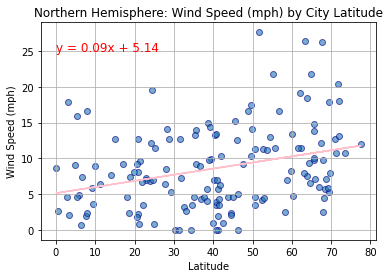

<Figure size 432x288 with 0 Axes>

In [131]:
x_value = north["Latitude"]
y_value = north["Wind Speed"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
n_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Northern Hemisphere: Wind Speed (mph) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(n_equation, (0,25), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("North Lat x Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

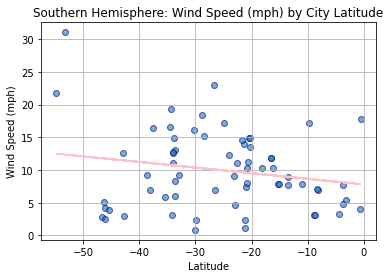

<Figure size 432x288 with 0 Axes>

In [133]:
x_value = south["Latitude"]
y_value = south["Wind Speed"]

linreg = linregress(x_value, y_value)
slope, intercept, rvalue, pvalue, stderr = linreg
s_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_value * slope + intercept

plt.scatter(x_value, y_value, alpha = 0.6, edgecolors = "navy")
plt.plot(x_value, regress, color = "pink")

plt.title("Southern Hemisphere: Wind Speed (mph) by City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(s_equation, (-20,40), fontsize = 12, color = "red")
plt.grid()
plt.show()
plt.savefig("South Lat x Wind.png")

In [134]:
# After each pair of plots, explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.

print(f"These scatter plots show the change in wind speed (mph) against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: {n_equation}, whilst the Southern Hemisphere linear equation is: {s_equation}. The Northern Hemisphere shows a positive correlation, however the Sothern Hemisphere shows a negative correlaton; suggesting that the closer the latitude to the equator, the lower the wind speed (mph).")

These scatter plots show the change in wind speed (mph) against city latitude by Northern and Southern Hemisphere. The Northern Hemisphere linear regression equation is: y = 0.09x + 5.14, whilst the Southern Hemisphere linear equation is: y = -0.09x + 7.81. The Northern Hemisphere shows a positive correlation, however the Sothern Hemisphere shows a negative correlaton; suggesting that the closer the latitude to the equator, the lower the wind speed (mph).
